In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/HOLLISTR_1_N101.csv')
df = df[['INTERVALSTARTTIME_GMT', 'MW']]
df.columns = ['dt', 'MW']
df['dt'] = pd.to_datetime(df['dt'].str.slice(0, -6).str.replace('T', ' '))

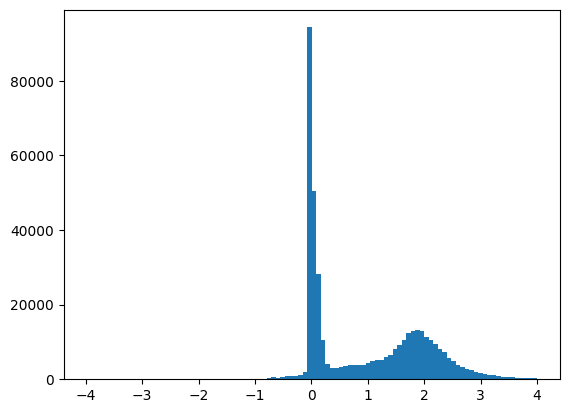

In [8]:
df['MW_daily'] = df['MW'] / df.groupby(df['dt'].dt.date)['MW'].transform('mean')
mwavg = df['MW_daily'].values
mwavg = mwavg[np.abs(mwavg) < 4]
plt.hist(mwavg, bins=100);

In [14]:
(df.groupby(df['dt'].dt.date)['MW_daily'].min() < 0).mean()

0.8191780821917808

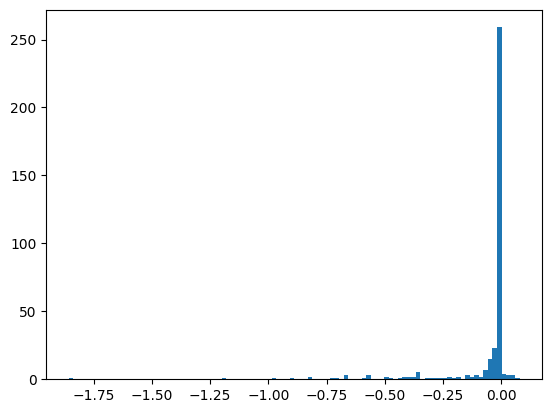

In [6]:
MW_daily_low = df.groupby(df['dt'].dt.date)['MW_daily'].quantile(0.05)
plt.hist(MW_daily_low, bins=100);